<a href="https://colab.research.google.com/github/Moi1oM/To_learn_AI/blob/master/Chp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

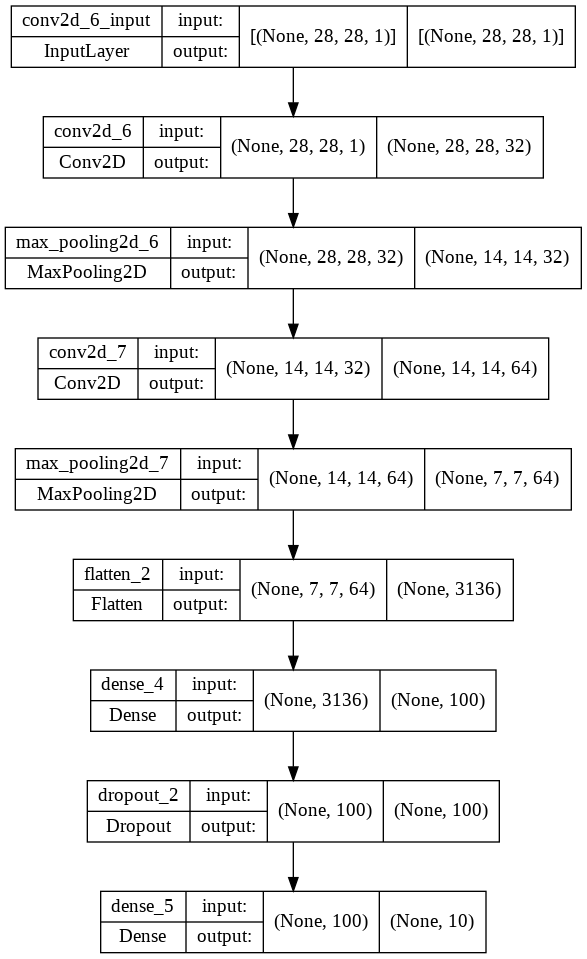

In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
keras.utils.plot_model(model,show_shapes=True)

Epoch 1/20
1500/1500 [==============================] - 67s 44ms/step - loss: 0.5281 - accuracy: 0.8102 - val_loss: 0.3465 - val_accuracy: 0.8700
Epoch 2/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3501 - accuracy: 0.8741 - val_loss: 0.2772 - val_accuracy: 0.8988
Epoch 3/20
1500/1500 [==============================] - 85s 57ms/step - loss: 0.3001 - accuracy: 0.8903 - val_loss: 0.2542 - val_accuracy: 0.9087
Epoch 4/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2671 - accuracy: 0.9030 - val_loss: 0.2468 - val_accuracy: 0.9066
Epoch 5/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2407 - accuracy: 0.9127 - val_loss: 0.2364 - val_accuracy: 0.9151
Epoch 6/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2190 - accuracy: 0.9198 - val_loss: 0.2314 - val_accuracy: 0.9159
Epoch 7/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2028 - accuracy: 0.9259 - val_loss: 0.2440 -

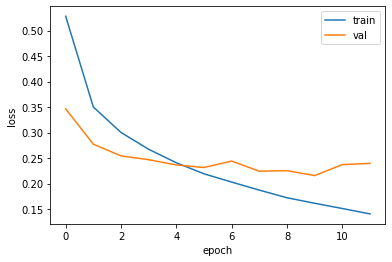

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

375/375 [==============================] - 4s 12ms/step - loss: 0.2156 - accuracy: 0.9235


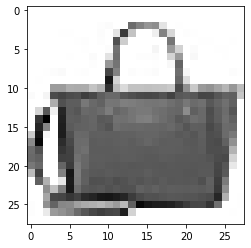

[[1.5109142e-17 7.4699167e-29 4.3335206e-24 7.4893742e-22 7.2998777e-23
  5.5784213e-16 7.5849946e-24 3.1891872e-17 1.0000000e+00 4.2482755e-17]]
가방
313/313 [==============================] - 4s 12ms/step - loss: 0.2403 - accuracy: 0.9159


[0.2402949035167694, 0.9158999919891357]

In [11]:
model.evaluate(val_scaled,val_target)
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()
preds=model.predict(val_scaled[0:1])
print(preds)
import numpy as np
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
print(classes[np.argmax(preds)])

test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

In [12]:
model=keras.models.load_model('best-cnn-model.h5')
model.layers

(3, 3, 1, 32) (32,)
-0.01986739 0.26385605


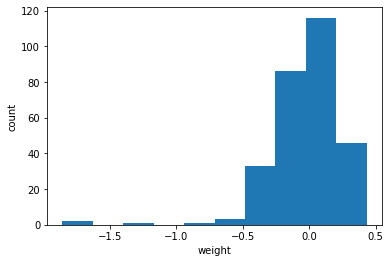

In [15]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

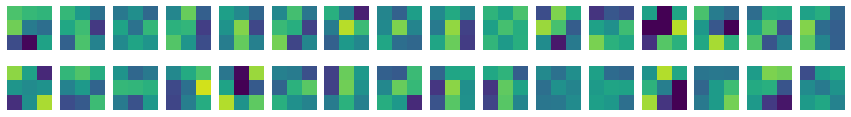

In [16]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
0.0064727576 0.076537356


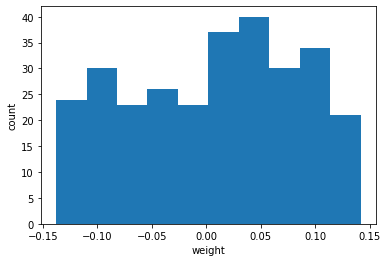

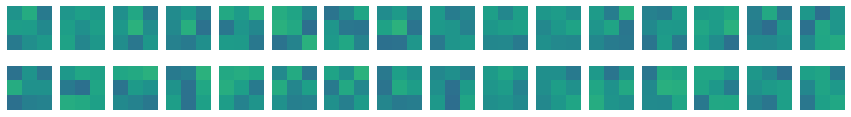

In [22]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation=\
                                          'relu',padding='same',input_shape=(28,28,1)))
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


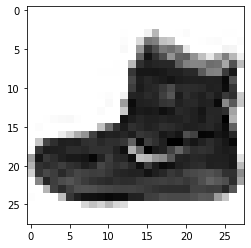

In [24]:
print(model.input)
conv_acti=keras.Model(model.input,model.layers[0].output)
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

(1, 28, 28, 32)


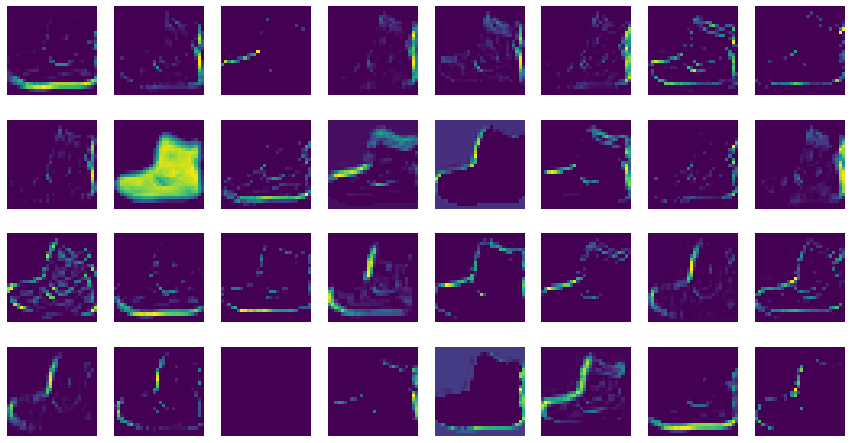

In [25]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)
print(feature_maps.shape)

fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()